In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = os.path.join("C:/Users/ss/Desktop/0study/TML2221 - MACHINE LEARNING/2 Tutorial/lab 10/X_Y_Sinusoid_Data.csv")

In [3]:
data = pd.read_csv(path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [5]:
X_real = np.linspace(0,1,100)
Y_real = np.sin(2*np.pi*X_real)

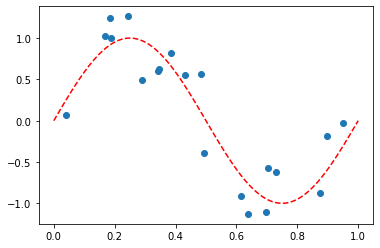

In [6]:
plt.scatter(data['x'], data["y"])
plt.plot(X_real, Y_real, ls='--', color='r', label='real function')
plt.show()

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

In [8]:
X = data[['x']]
y = data[['y']]

In [9]:
X_poly = pf.fit_transform(X)

In [10]:
lr.fit(X_poly, y)

LinearRegression()

In [11]:
pred = lr.predict(X_poly)

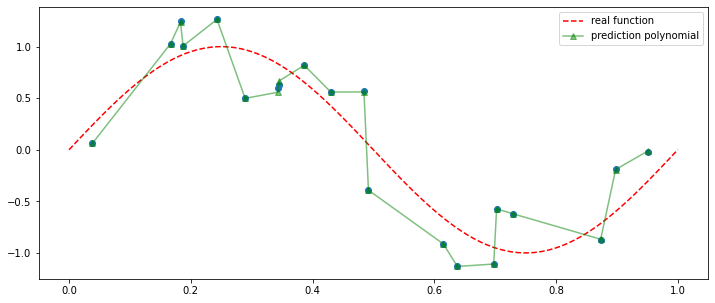

In [17]:
plt.figure(figsize = (12,5))
# plt.plot(X, y, marker='o', color='b', label='data', alpha=1)
plt.scatter(X, y)
plt.plot(X_real, Y_real, ls='--', color='r', label='real function')
plt.plot(X, pred, marker='^', color='g', alpha=0.5, label='prediction polynomial')
plt.legend(loc='upper right')
plt.show()

In [15]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

In [16]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

rr = Ridge(alpha=0.001)
rr.fit(X_poly, y)
pred_rr = rr.predict(X_poly)

ls = Lasso(alpha=0.0001)
ls.fit(X_poly, y)
pred_ls = ls.predict(X_poly)

en = ElasticNet(alpha=0.0001, l1_ratio=0.5)
en.fit(X_poly, y)
pred_en = en.predict(X_poly)

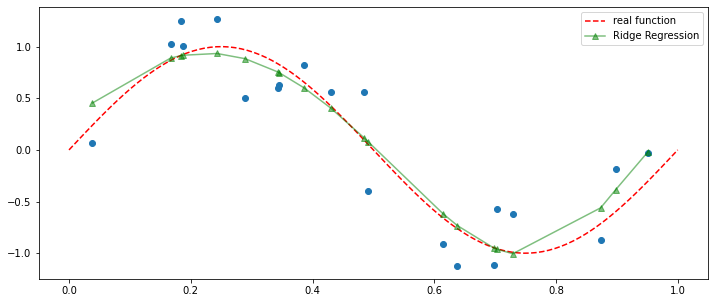

In [18]:
plt.figure(figsize = (12,5))
# plt.plot(X, y, marker='o', color='b', label='data', alpha=1)
plt.scatter(X, y)
plt.plot(X_real, Y_real, ls='--', color='r', label='real function')

#plt.plot(X, pred, marker='^', color='g', alpha=0.5, label='prediction polynomial')
plt.plot(X, pred_rr, marker='^', color='g', alpha=0.5, label='Ridge Regression')
#plt.plot(X, pred_ls, marker='^', color='g', alpha=0.5, label='Lasso Regression')
#plt.plot(X, pred_en, marker='^', color='g', alpha=0.5, label='ElasticNet')

plt.legend(loc='upper right')
plt.show()

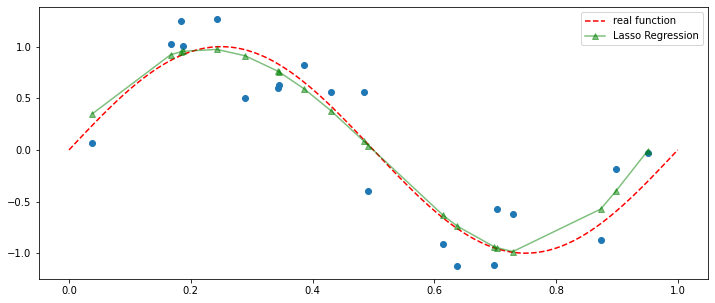

In [19]:
plt.figure(figsize = (12,5))
# plt.plot(X, y, marker='o', color='b', label='data', alpha=1)
plt.scatter(X, y)
plt.plot(X_real, Y_real, ls='--', color='r', label='real function')

#plt.plot(X, pred, marker='^', color='g', alpha=0.5, label='prediction polynomial')
#plt.plot(X, pred_rr, marker='^', color='g', alpha=0.5, label='Ridge Regression')
plt.plot(X, pred_ls, marker='^', color='g', alpha=0.5, label='Lasso Regression')
#plt.plot(X, pred_en, marker='^', color='g', alpha=0.5, label='ElasticNet')

plt.legend(loc='upper right')
plt.show()

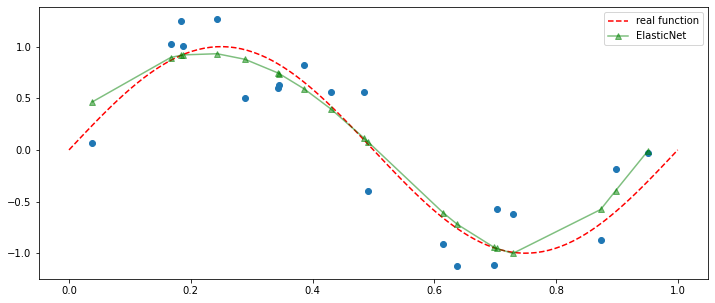

In [20]:
plt.figure(figsize = (12,5))
# plt.plot(X, y, marker='o', color='b', label='data', alpha=1)
plt.scatter(X, y)
plt.plot(X_real, Y_real, ls='--', color='r', label='real function')

#plt.plot(X, pred, marker='^', color='g', alpha=0.5, label='prediction polynomial')
#plt.plot(X, pred_rr, marker='^', color='g', alpha=0.5, label='Ridge Regression')
#plt.plot(X, pred_ls, marker='^', color='g', alpha=0.5, label='Lasso Regression')
plt.plot(X, pred_en, marker='^', color='g', alpha=0.5, label='ElasticNet')

plt.legend(loc='upper right')
plt.show()

In [22]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

In [23]:
X.shape

(1797, 64)

In [24]:
y.shape

(1797,)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X, y)

pred = knn.predict(X)



In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y, pred)

1.0

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=0)

In [32]:
print(X_trian.shape)
print(y_trian.shape)
print(X_test.shape)
print(y_test.shape)

NameError: name 'X_trian' is not defined

In [33]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

accuracy_score(y_test, pred)


0.9888888888888889

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                    test_size=0.25, random_state=0)

In [35]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

pred = knn.predict(X_train)
print("Training Accuracy", accuracy_score(y_train, pred))

pred = knn.predict(X_valid)
print("Validation Accuracy", accuracy_score(y_valid, pred))

pred = knn.predict(X_test)
print("Testing Accuracy", accuracy_score(y_test, pred))

Training Accuracy 1.0
Validation Accuracy 0.9861111111111112
Testing Accuracy 0.9833333333333333


In [36]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors = 1)

scores = cross_val_score(knn, X, y, cv=5)

print(scores)

[0.96111111 0.95277778 0.96657382 0.98607242 0.95543175]


In [37]:
scores.mean()

0.9643933766635715

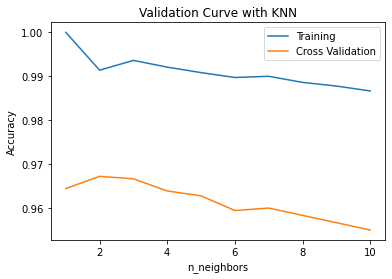

In [38]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1,11,1)

knn = KNeighborsClassifier()

train_score, test_score = validation_curve(knn,
                                          X, y,
                                          param_name='n_neighbors',
                                          param_range=param_range,
                                          cv=5,
                                          scoring='accuracy')

mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)

plt.plot(param_range, mean_train_score, label='Training')
plt.plot(param_range, mean_test_score, label='Cross Validation')

plt.title("Validation Curve with KNN")

plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators' : [10,20,30],
         'max_depth' : [3,5,7,9],
         'max_features' : [0.5,0.75,1.0]}

rf = RandomForestClassifier()

gs = GridSearchCV(rf, params, cv=5)

gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': [0.5, 0.75, 1.0],
                         'n_estimators': [10, 20, 30]})

In [40]:
gs.best_params_

{'max_depth': 9, 'max_features': 0.5, 'n_estimators': 30}

In [41]:
pred = gs.predict(X_train)
print("Training Accuracy", accuracy_score(y_train, pred))

pred = gs.predict(X_valid)
print("Validation Accuracy", accuracy_score(y_valid, pred))

pred = gs.predict(X_test)
print("Testing Accuracy", accuracy_score(y_test, pred))

Training Accuracy 1.0
Validation Accuracy 0.9472222222222222
Testing Accuracy 0.9555555555555556
